In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph

In [2]:
hard_sales_df = hs.load_hard_sales()
hard_list = hs.get_hw_names(hard_sales_df)

In [3]:
pivot_df = hs.pivot_cumulative_sales_by_delta(hard_sales_df, ['NSW', 'NS2', 'PS5'])
pivot_df

hw,NS2,NSW,PS5
delta_week,,,
0,947931.0,330637.0,118085.0
1,1101136.0,394057.0,160976.0
2,1241162.0,444878.0,201435.0
3,1402183.0,524371.0,213328.0
4,1530826.0,556633.0,224384.0
...,...,...,...
433,NaN,35778126.0,NaN
434,NaN,35793449.0,NaN
435,NaN,35811161.0,NaN


/var/folders/p4/348jfj6522l78r8xkkk0csb40000gn/T/ipykernel_87747/1525725491.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


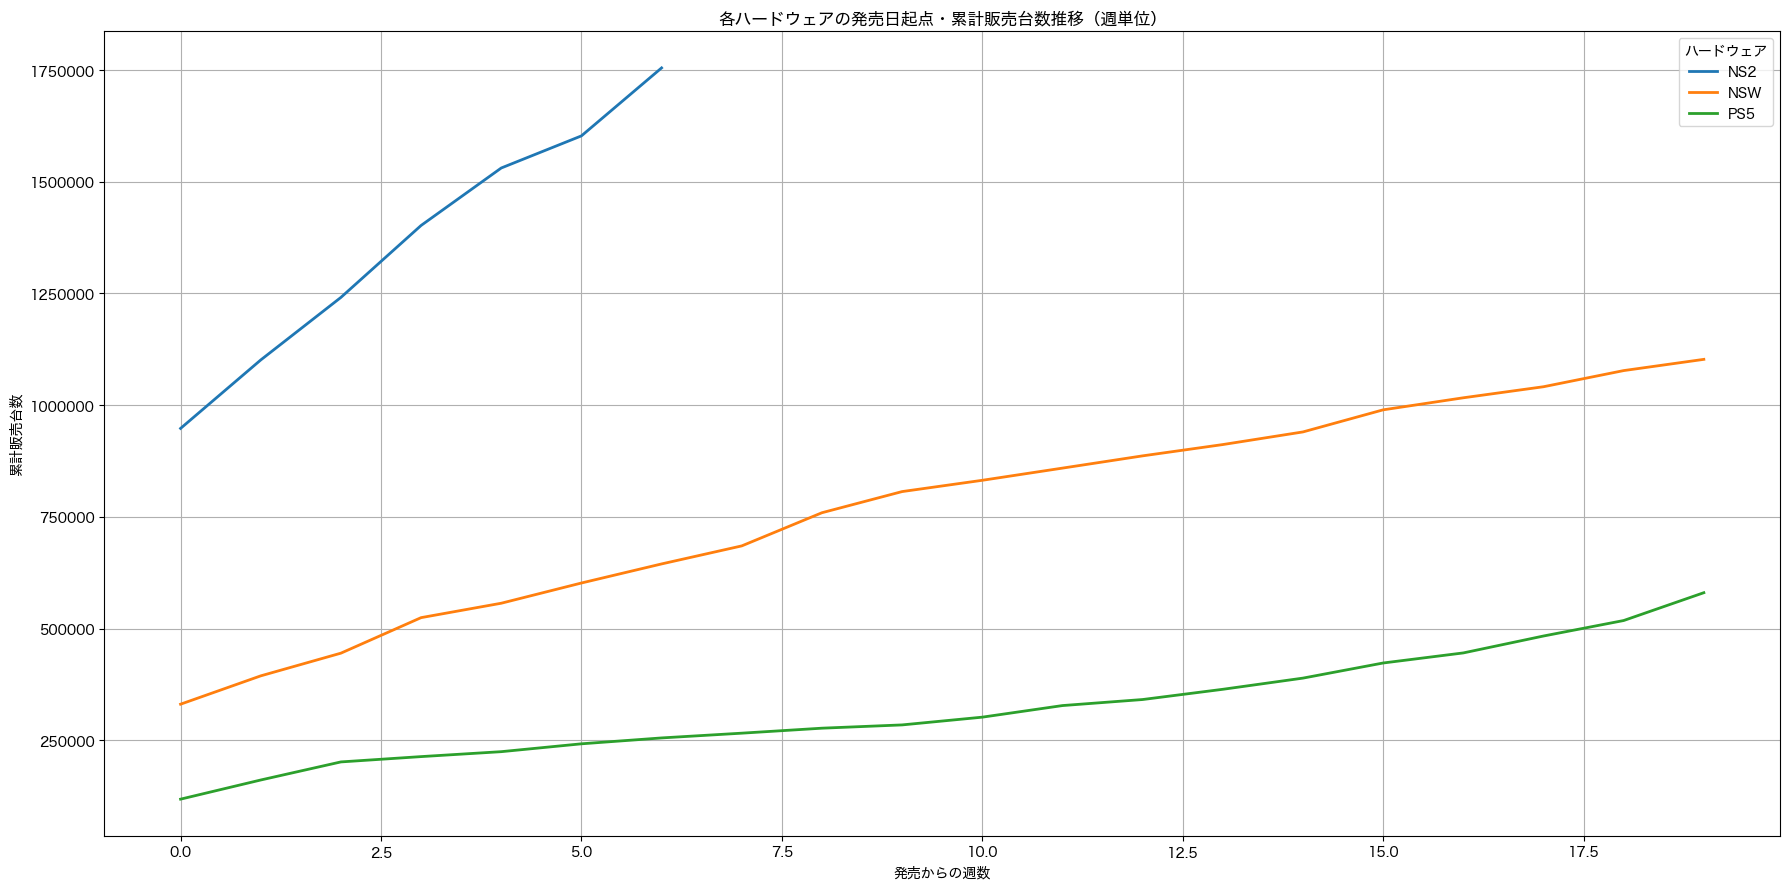

In [7]:
fig = ph.plot_cumulative_sales_by_delta(hard_sales_df, ["NS2", "NSW", "PS5"], limit=20, monthly=False)
fig.show()

/var/folders/p4/348jfj6522l78r8xkkk0csb40000gn/T/ipykernel_87747/1358273234.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


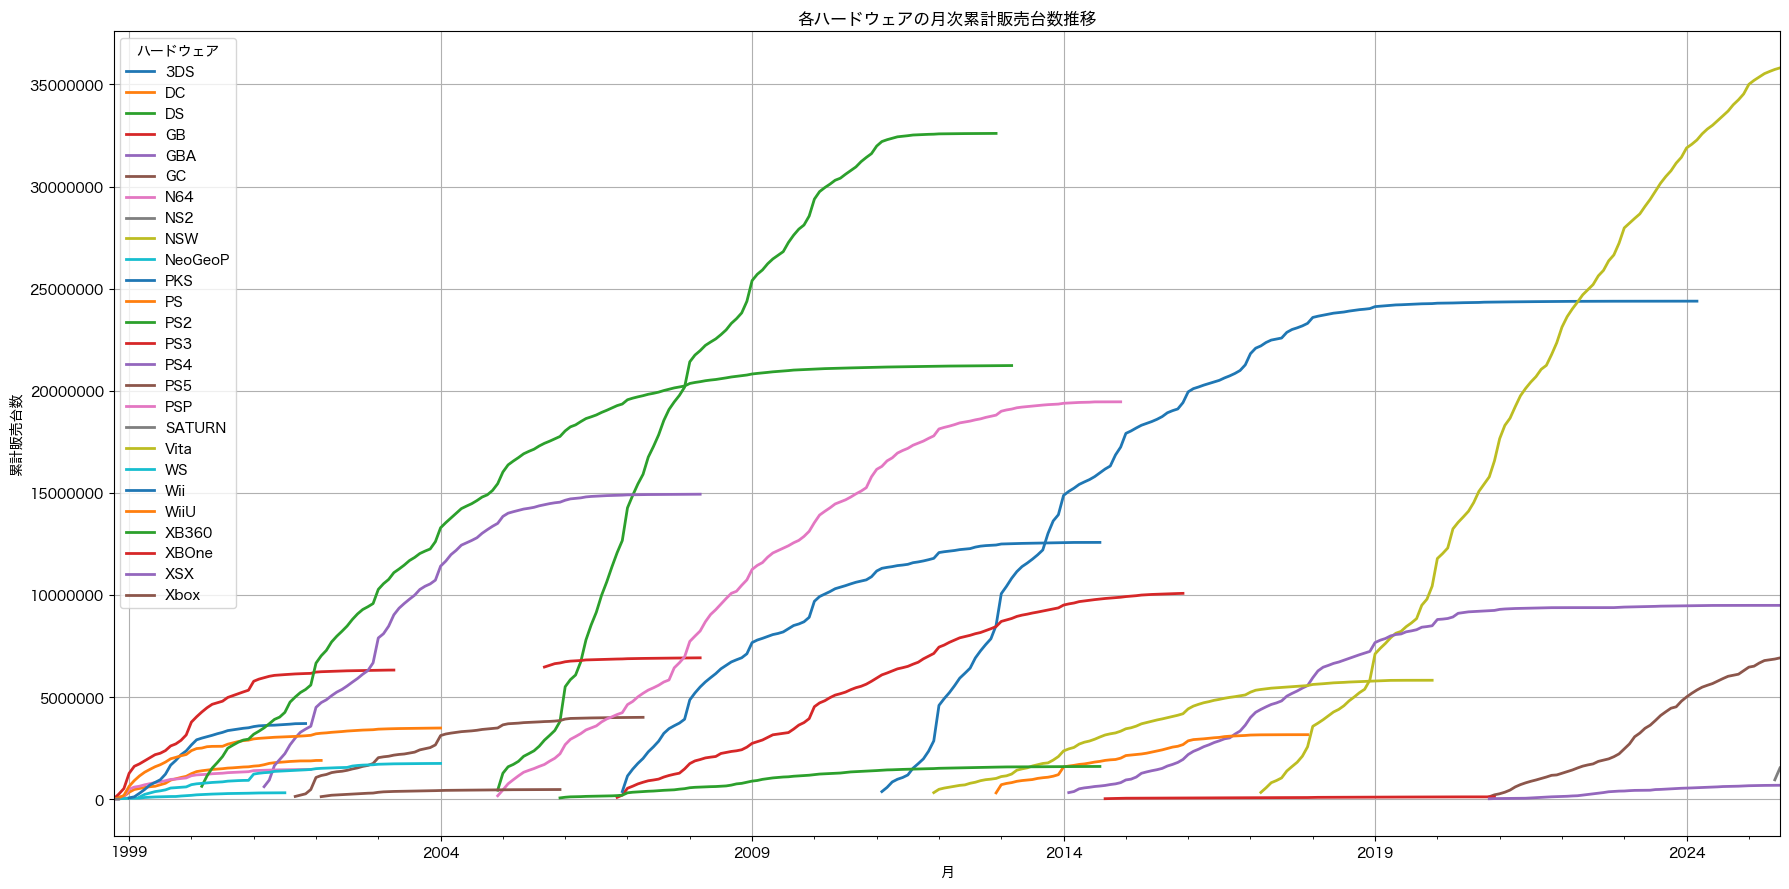

In [5]:

fig = ph.plot_cumulative_sales(hard_sales_df, hard_list, monthly=True)
fig.show()

/var/folders/p4/348jfj6522l78r8xkkk0csb40000gn/T/ipykernel_87747/1127207114.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


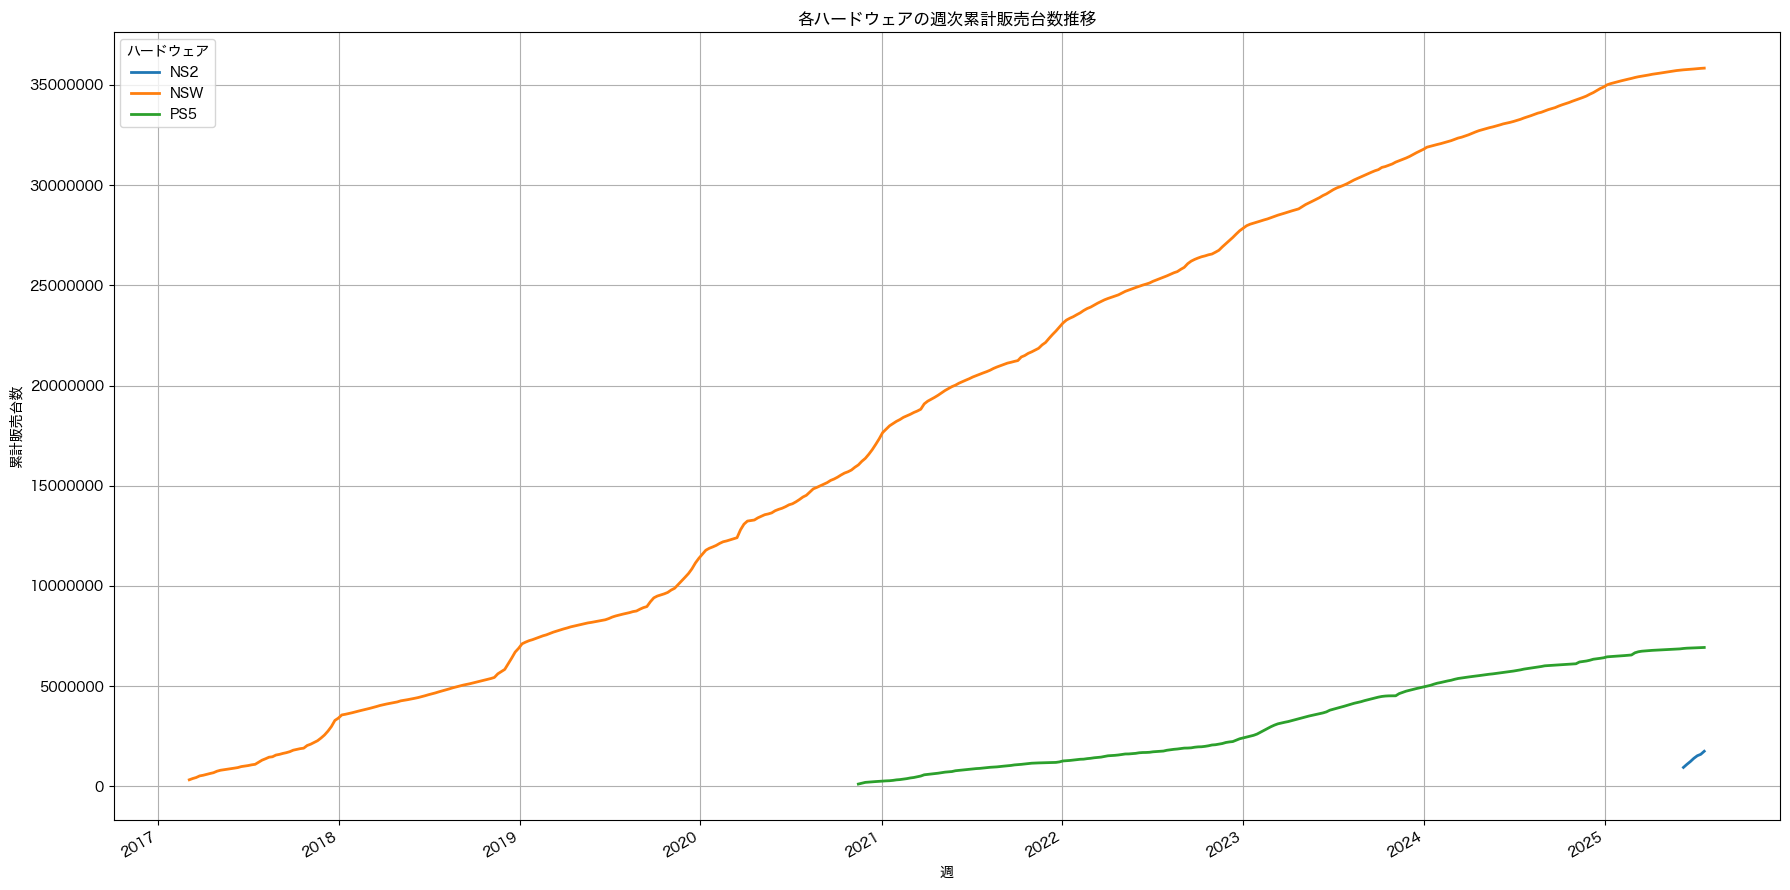

In [6]:
fig = ph.plot_cumulative_sales(hard_sales_df, ["NSW", "NS2", "PS5"])
fig.show()